In [47]:
# let's import some libraries, shall we?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fetching the csv's into dataframes

df_clients = pd.read_csv("clients.csv")
df_sales = pd.read_csv("ventes.csv")
df_products = pd.read_csv("produits.csv")

In [13]:
# now it's time to clean them a bit

# let's start by removing duplicates
df_clients = df_clients.drop_duplicates()
df_sales = df_sales.drop_duplicates()
df_products = df_products.drop_duplicates()

# print(df_clients.isnull().sum()
# .sort_values(ascending = False) / len(df_clients))
# print(df_sales.isnull().sum()
# .sort_values(ascending = False) / len(df_sales))
# print(df_products.isnull().sum()
# .sort_values(ascending = False) / len(df_products))

# here was checked whether data was missing or not
# and it confirmed there was no missing data detected

In [20]:
# while there still are negative prices
while int(df_products[['price']].min()) < 0:
    incorrect_price = df_products['price'].argmin()
    df_products = df_products.drop(
        incorrect_price
    ).reset_index(drop = True) # drop it

In [42]:
# importing pre-done stats functions
###
# REMINDER: use list() to convert Series-types
# into, well, lists to use those functions with


def avg(v): # average
    sum = 0
    for i in (v):
        sum += i
    return(sum / len(v))


def var(v): # variance
    diffs = []
    for i in (v): # = SUM of each ((v(i) - avg(v))^2)
        diffs.append((i - avg(v)) ** 2)
    return(avg(diffs)) # = average of above formula


def stdev(v): # spread
    return(var(v) ** 0.5) # square root = ^0.5


def med(v): # median
    v.sort() # better sort the list to find which item is in the middle
    if len(v) % 2 == 1 :
        # if v is of odd length
        median = v[int((len(v) - 1) / 2)] # the item in the middle
    else :
        # if v is of even length
        middle = [v[int((len(v) / 2) - 1)], v[int(len(v) / 2)]]
        median = avg(middle) # the average of the two middle-most items
    return(median)

In [35]:
# gini index


def gini(v):
    v.sort() # getting the list items in order
    n = len(v)      # count
    q = 2 / n       # coefficient
    k = (n + 1) / n # constant
    sum = 0
    wsum = 0        # weighted sum
    for i in range (0, n):
        sum += v[i]
        wsum += (i + 1) * v[i]
    return(q * wsum / sum - k)

In [49]:
# lorenz curve


def lorenz(v):
    v.sort() # getting the list items in order
    sum = 0
    for i in (v):
        sum += i
    csum = 0 # cumulative sum
    curve = [0] # the origin 0 value
    for i in (v):
        csum += i
        curve.append(csum / sum)
    return(curve)

Central tendency and dispersion indicators of product prices:

	Mean     : 21.863597078514857
	Variance : 890.7385487165337
	St. Dev. : 29.845243318099012
	Median   : 13.075


<AxesSubplot:>

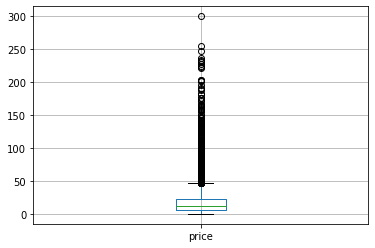

In [87]:
print("Central tendency and dispersion indicators of product prices:\n")
print("\tMean     : " + str(avg(list(df_products['price']))))
print("\tVariance : " + str(var(list(df_products['price']))))
print("\tSt. Dev. : " + str(stdev(list(df_products['price']))))
print("\tMedian   : " + str(med(list(df_products['price']))))

df_products[['price']].boxplot()

Lorenz curve of product prices:


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\4001052134.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


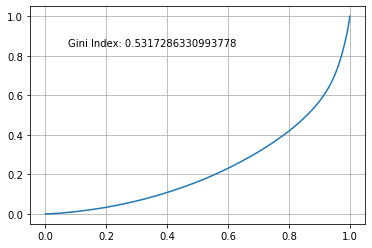

In [68]:
# plotting the lorenz curve of price
pricecurve = lorenz(list(df_products['price']))
pricegini = gini(list(df_products['price']))
textgini = "Gini Index: " + str(pricegini)

print("Lorenz curve of product prices:")

# plot
X = np.linspace(0.0, 1.0, len(pricecurve))
Y = pricecurve

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.grid()
ax.text(0.35, 0.85, textgini, ha = 'center')

fig.show()

Clients age distribution:


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\1568550168.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


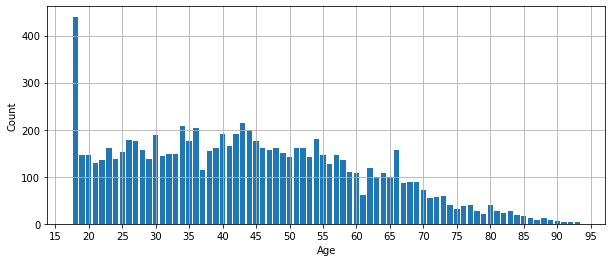

In [84]:
# barplotting the sales per ages

# init
ages = []
agedist = []

# gathering ages of everyone
# (I'm going to cheat a bit since all sales happened in 2021-2022)
for i in df_clients.index:
    ages.append(2022 - int(df_clients.loc[i, "birth"]))

ages.sort() # the first item is now the youngest age
minage = ages[0]
ages.reverse() # now it's the oldest age
maxage = ages[0]
ages.reverse() # to make it usable in the next for loop


curi = 0 # item pointer
curage = minage # age pointer
while curage <= maxage: # repeat the following until reaching max age
    count = 0
    if ages[curi] < curage:
        curi += 1 # advance item pointer if pointed item's age < current age
    if ages[curi] == curage:
        while ages[curi] == curage: # if pointed item's age is current age,
            count += 1 # add one count for as many as there is of this age
            curi += 1
            if curi >= len(ages): # extra security
                break
    if curi >= len(ages): #if the list is over
        agedist.append(count) # add the count to the list
        break
    elif ages[curi] > curage: # if the count is over
        agedist.append(count) # add the count to the list
        curage += 1

agedist = np.array(agedist) # to avoid type conflict


print("Clients age distribution:")

# plot
X = np.arange(minage, maxage + 1, 1)
Y = agedist[(X - minage)]

fig, ax = plt.subplots()

ax.bar(X, Y)
ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Count")

ax.set_xticks(np.arange(int(minage / 5) * 5,
                        (int(maxage / 5) + 1) * 5 + 1, 5))
fig.set_figwidth(10) # all of this is for readability

fig.show()